In [127]:
import os
import json

import numpy as np

In [128]:
data_path = "../../data/results/two-shot/5x5-relation/"

data = []
for parent_folder in os.listdir(f"./{data_path}"):
    for child_folder in os.listdir(f"./{data_path}/{parent_folder}"):
        for file_name in os.listdir(f"./{data_path}/{parent_folder}/{child_folder}"):
            filepath = os.path.join(f"./{data_path}/{parent_folder}/{child_folder}", file_name)
            with open(filepath, "r") as file:
                json_data = json.load(file)
                data.append(json_data)
                
f1_scores_overall = [d["metrics"]["overall_metrics"]["f1_score"] for d in data]
f1_scores_entity = [d["metrics"]["entity_metrics"]["overall"]["f1_score"] for d in data]
f1_scores_relation = [d["metrics"]["relation_metrics"]["overall"]["f1_score"] for d in data]

In [129]:
f1_score_overall = np.round(np.mean(f1_scores_overall), 2)

f1_score_overall

0.16

In [130]:
f1_score_entity = np.round(np.mean(f1_scores_entity), 2)

f1_score_entity

0.22

In [131]:
f1_score_relation = np.round(np.mean(f1_scores_relation), 2)

f1_score_relation

0.09

In [132]:
data_path = "../../data/results/two-shot/5x5-relation-with-reference/"

data = []
for parent_folder in os.listdir(f"./{data_path}"):
    for child_folder in os.listdir(f"./{data_path}/{parent_folder}"):
        for file_name in os.listdir(f"./{data_path}/{parent_folder}/{child_folder}"):
            filepath = os.path.join(f"./{data_path}/{parent_folder}/{child_folder}", file_name)
            with open(filepath, "r") as file:
                json_data = json.load(file)
                data.append(json_data)
                
f1_scores_overall_with_reference = [d["metrics"]["overall_metrics"]["f1_score"] for d in data]
f1_scores_entity_with_reference = [d["metrics"]["entity_metrics"]["overall"]["f1_score"] for d in data]
f1_scores_relation_with_reference = [d["metrics"]["relation_metrics"]["overall"]["f1_score"] for d in data]

In [133]:
f1_score_overall_with_reference = np.round(np.mean(f1_scores_overall_with_reference), 2)

f1_score_overall_with_reference

0.14

In [134]:
f1_score_entity_with_reference = np.round(np.mean(f1_scores_entity_with_reference), 2)

f1_score_entity_with_reference

0.22

In [135]:
f1_score_relation_with_reference = np.round(np.mean(f1_scores_relation_with_reference), 2)

f1_score_relation_with_reference

0.05

In [136]:
data_path = "../../data/results/two-shot/5x5-relation-with-gold/"

data = []
for parent_folder in os.listdir(f"./{data_path}"):
    for child_folder in os.listdir(f"./{data_path}/{parent_folder}"):
        for file_name in os.listdir(f"./{data_path}/{parent_folder}/{child_folder}"):
            filepath = os.path.join(f"./{data_path}/{parent_folder}/{child_folder}", file_name)
            with open(filepath, "r") as file:
                json_data = json.load(file)
                data.append(json_data)

f1_scores_relation_with_gold = [d["metrics"]["relation_metrics"]["overall"]["f1_score"] for d in data]

In [137]:
f1_score_relation_with_gold = np.round(np.mean(f1_scores_relation_with_gold), 2)

f1_score_relation_with_gold

0.34

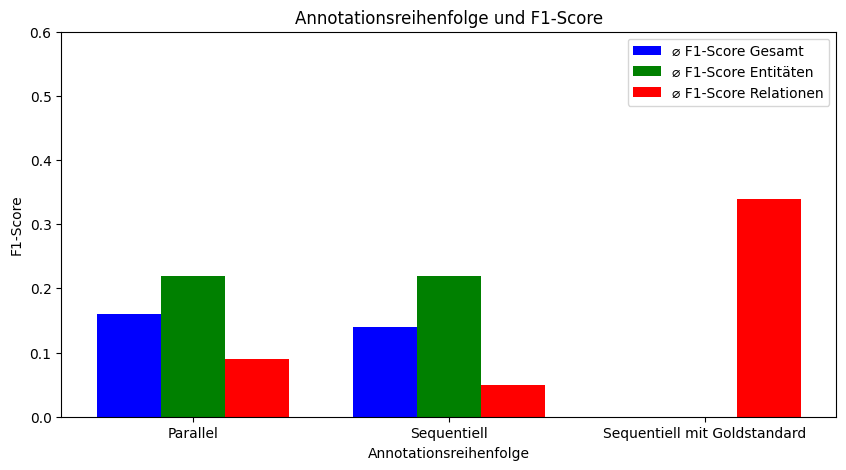

In [138]:
import numpy as np
import matplotlib.pyplot as plt

categories = ['Parallel', 'Sequentiell', 'Sequentiell mit Goldstandard']

total_values = [f1_score_overall, f1_score_overall_with_reference, 0]
entity_values = [f1_score_entity, f1_score_entity_with_reference, 0]
relation_values = [f1_score_relation, f1_score_relation_with_reference, f1_score_relation_with_gold]

bar_width = 0.25

r1 = np.arange(len(categories))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(10, 5))

plt.bar(r1, total_values, color='b', width=bar_width, label='⌀ F1-Score Gesamt')
plt.bar(r2, entity_values, color='g', width=bar_width, label='⌀ F1-Score Entitäten')
plt.bar(r3, relation_values, color='r', width=bar_width, label='⌀ F1-Score Relationen')

plt.xlabel('Annotationsreihenfolge')
plt.xticks([r + bar_width for r in range(len(categories))], categories)

plt.ylim((0, 0.6))

plt.ylabel('F1-Score')
plt.title('Annotationsreihenfolge und F1-Score')

plt.legend()

plt.savefig("./images/vergleich_reihenfolge.png", dpi=700)

plt.show()
